# Laboratorio 3: Modelos lineales

Integrantes: Pablo Arroyo Martínez (Sección 2) // Natalia Valencia Valenzuela (Sección 2)


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

In [106]:
%matplotlib inline

## Dataset sintético

Simulamos un dataset con datos aleatorios, siguiendo una distribución uniforme $\mathcal{U}_{(0,1)}$.

In [107]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.43826207, 0.03734739],
       [0.72968886, 0.39379275],
       [0.64207332, 0.42765739],
       [0.98624889, 0.72842659],
       [0.05285762, 0.14829734]])

Crearemos el siguiente modelo inicial: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

Necesitaremos aproximar $Y$ usando los descriptores $X_1$ y $X_2$.

$\epsilon $~$ \mathcal{U}_{(0,1)}$ es una fuente de ruido que no podemos controlar para la predicción.

In [108]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([1.80475672, 2.27125192, 2.14208437, 2.38154931, 0.46684572])

## Parte 1: División en bases de datos de entrenamiento y de prueba

Necesitamos probar nuestro modelo en una base de datos diferente a la utilizada para el entrenamiento **para medir su capacidad de generalización**.

Queremos que el modelo aprenda la ley $3 X_1 - 2 X_2^2$ y el **sobreaprendizaje equivaldría a memorizar el vector de ruido $\epsilon$**, que solo corresponde a variaciones en $Y$ independientes de nuestro modelo.

Usar [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

1. Separar los datos en conjuntos de entrenamiento y prueba, con un 75% y 25% de los datos respectivamente.

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

## Parte 2: Regresión Lineal

Encontrar los parámetros $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solución de $\underset{\theta}{\arg\min} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Donde $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ (en nuestro caso $D=2$)

Calcular el coeficiente $R^2$.
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Donde $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ y $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

2. Entrene un modelo de regresión lineal con los datos.

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


In [110]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

3. Imprima los primeros 5 valores de y_test, y los 5 primeros valores predichos por el modelo.

In [111]:
y_test[:5]

array([ 1.68931166,  2.8487269 ,  1.13380087, -0.28558355,  2.00087075])

In [112]:
reg.predict(X_test)[:5]

array([ 1.62715455,  3.24069755,  1.1564564 , -0.39631922,  2.1735603 ])

4. ¿Cuál es el coeficiente $R^2$ del modelo?

Use [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test))

0.9160505682130886

## Parte 3: mejorar el modelo aplicando una transformación bien elegida

El modelo inicial es: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Añadiremos coeficientes polinomiales con [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

El conjunto de descriptores inicial $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$
se convertirá ahora en $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ lo que deja:

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

5. Genere un conjunto de descriptores `X_train2` con `PolynomialFeatures()` usando el parámetro `degree=2`

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train2 = poly.fit_transform(X_train)

6. Imprima los primeros 5 valores de `X_train` y de `X_train2`

In [115]:
X_train[:5]

array([[0.87438314, 0.70783162],
       [0.62579188, 0.0855331 ],
       [0.21019597, 0.67871474],
       [0.45538185, 0.66804943],
       [0.87032814, 0.88607183]])

In [116]:
X_train2[:5]

array([[1.        , 0.87438314, 0.70783162, 0.76454588, 0.61891604,
        0.50102561],
       [1.        , 0.62579188, 0.0855331 , 0.39161548, 0.05352592,
        0.00731591],
       [1.        , 0.21019597, 0.67871474, 0.04418235, 0.1426631 ,
        0.46065369],
       [1.        , 0.45538185, 0.66804943, 0.20737263, 0.30421758,
        0.44629005],
       [1.        , 0.87032814, 0.88607183, 0.75747107, 0.77117324,
        0.78512328]])

7. Entrene el modelo de regresión lineal con PolynomialFeatures. ¿Cuál es su coeficiente $R^2$?

In [117]:
X_test_poly = poly.transform(X_test)

reg2 = LinearRegression().fit(X_train2, y_train)

r2_score(y_test, reg2.predict(X_test_poly))

0.9317443170415405

## Parte 4: Entrenar un modelo random forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

8. Entrene un modelo de regresión Random Forest sobre los datos (sin PolynomialFeatures)

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=12345).fit(X_train, y_train)


9. ¿Cuál es su coeficiente $R^2$?

In [119]:
r2_score(y_test, rf.predict(X_test))

0.9088029584684331

10. Entrene un modelo `RandomForest` con `PolynomialFeatures` y `degree=2`

In [120]:
rf2 = RandomForestRegressor(random_state=12345).fit(X_train2, y_train)

## Parte 5: Comparemos los modelos

Compararemos los modelos con los datos iniciales y datos nuevos.

Los datos nuevos representan la misma función en otro rango. Estos se generan con $X_1, X_2$ ~ $\mathcal{U}_{(0.5,1.5)}$

In [121]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

11. Genere una tabla (un DataFrame de pandas) que muestre para cada uno de los 4 modelos entrenados, los coeficientes $R^2$ al predecir los datos iniciales, y los coeficientes al predecir los datos generados en la celda anterior.

In [122]:
import pandas as pd

X_test2_poly = poly.transform(X_test2)

modelos = [
    ("Regresión Lineal", reg, X_test, X_test2),
    ("Regresión Lineal+Poly", reg2, X_test_poly, X_test2_poly),
    ("RandomForest", rf, X_test, X_test2),
    ("RandomForest+Poly", rf2, X_test_poly, X_test2_poly),
]

res = []
for name, model, x_original, x_nuevo in modelos:
    r2_original = r2_score(y_test, model.predict(x_original))
    r2_nuevo = r2_score(y_test2, model.predict(x_nuevo))
    res.append({
        "Modelo": name,
        "R² en datos originales": r2_original,
        "R² en nuevos datos": r2_nuevo
    })

df_resultados = pd.DataFrame(res)
print(df_resultados)

                  Modelo  R² en datos originales  R² en nuevos datos
0       Regresión Lineal                0.916051            0.684235
1  Regresión Lineal+Poly                0.931744            0.958489
2           RandomForest                0.908803            0.568982
3      RandomForest+Poly                0.910959            0.543735


12. ¿Cuál modelo tiene el mejor desempeño? ¿Por qué un modelo generaliza mejor que el resto?

R: El modelo con un mejor desempeño es el de Regresión Lineal con el añadido de coeficientes polinomiales. En los datos originales es el que mejor $R^2$ tiene y además con los nuevos datos es el que se ve menos afectado, mejorando su coeficiente de hecho, mientras que el coeficiente de los otros modelos bajaron significativamente con los nuevos datos. Reg lineal con coef polinomimales generaliza mejor, ya que no se sobreajusta tanto a los datos como random forest (menos overfitting, más capacidad de generalización). Con los coefs aprendidos (siguiente parte) puede seguir funcionando bien fuera del dominio original.

13. ¿Cuáles son los coeficientes aprendidos por el modelo de regresión lineal con PolynomicFeatures?

In [123]:
reg2.coef_

array([ 0.        ,  3.17736197,  0.0267548 , -0.11374428, -0.06927075,
       -1.99812682])

## Parte 6: Visualizando el sobreajuste con un árbol de decisión

A medida que aumenta la complejidad del modelo, se produce de nuevo un sobreajuste. De igual forma, el modelo que utiliza solo $X_1$ y $X_2$ no está necesariamente adaptado al problema y presenta un caso de subaprendizaje.

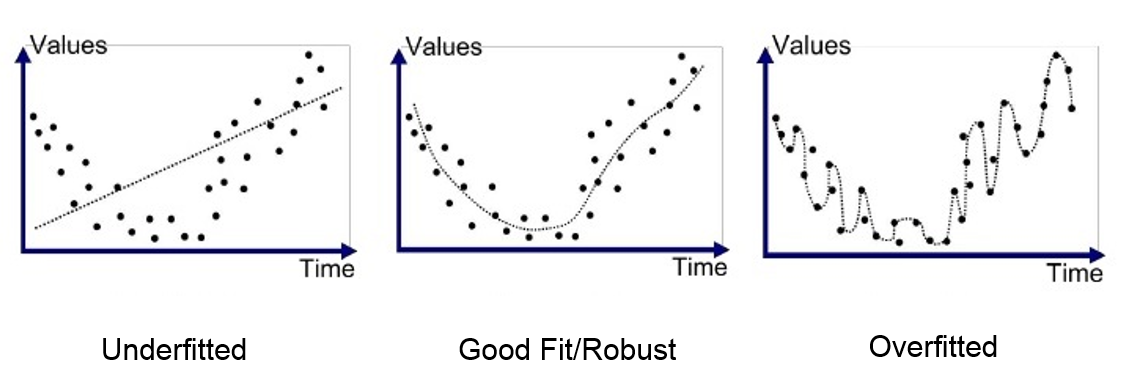

Para el primer conjunto de datos {X_train, y_train},

14. Entrene un **Arbol de Decisión** con el argumento `max_depth`= 1...20. Para cada uno, guarde su coeficiente $R^2$ al predecir el conjunto de entrenamiento, y al predecir el conjunto de prueba.

In [124]:
from sklearn.tree import DecisionTreeRegressor

res = []
for md in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=md, random_state=12345)

    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    res.append({
        "max_depth": md,
        "R² entrenamiento": r2_train,
        "R² prueba": r2_test
    })

df_tree = pd.DataFrame(res)

15. Muestre un gráfico de la evolución de los coeficientes $R^2$ de la parte anterior según la profundidad máxima del árbol de decisión.

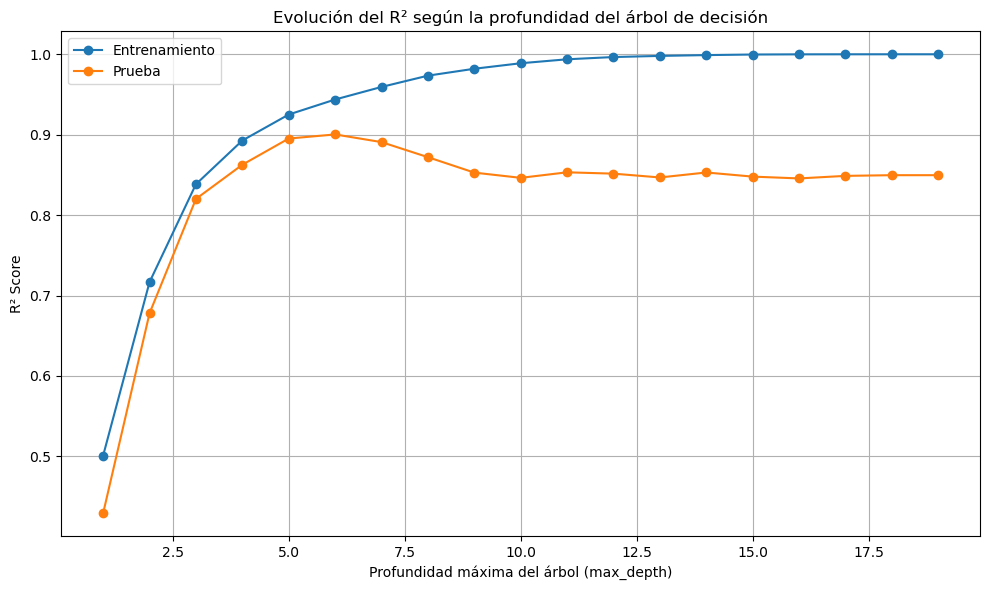

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_tree["max_depth"], df_tree["R² entrenamiento"], label="Entrenamiento", marker='o')
plt.plot(df_tree["max_depth"], df_tree["R² prueba"], label="Prueba", marker='o')
plt.xlabel("Profundidad máxima del árbol (max_depth)")
plt.ylabel("R² Score")
plt.title("Evolución del R² según la profundidad del árbol de decisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Parte 7: Aumentar el número de características y regularizar una regresión

El objetivo es examinar el impacto de la regularización de los coeficientes de una regresión a medida que aumenta el número de coeficientes. Utilizamos características polinómicas y técnicas de regularización [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) o [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

**Regularización**: agregar una penalización al modelo (a la función de entrenamiento) para evitar que aprenda demasiado los datos de entrenamiento.
- Lasso (o L1): se penaliza la suma del valor absoluto de los coeficientes.
- Ridge (o L2): se penaliza la suma de los valores cuadrados de los coeficientes.

16. Genere una tabla donde para cada `degree=1..20`, se guarde:
    * número de coeficientes de $\theta$ (igual al número de columnas de $X$)
    * $R^2$ para cada modelo de regresión
    * norma del vector de coeficientes para cada modelo de regresión
    * cantidad de coeficientes no nulos para cada moelo de regresión

In [126]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin #nplin tiene la funcion norm
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

res = []
for d in range(1, 21):
    poly = PolynomialFeatures(degree=d)
    X_train_d = poly.fit_transform(X_train)
    X_test_d = poly.transform(X_test)
    num_coef = X_train_d.shape[1]

    reg = LinearRegression().fit(X_train_d, y_train)
    r2_reg = r2_score(y_test, reg.predict(X_test_d))

    ridge = Ridge(alpha=0.1).fit(X_train_d, y_train)
    r2_ridge = r2_score(y_test, ridge.predict(X_test_d))

    lasso = Lasso(alpha=0.1).fit(X_train_d, y_train)
    r2_lasso = r2_score(y_test, lasso.predict(X_test_d))

    res.append({
        "degree": d,
        "Coefs_totales": num_coef,
        "R² Reg": r2_reg,
        "R² Ridge": r2_ridge,
        "R² Lasso": r2_lasso,
        "Reg (coefs no nulos)": coef_non_nuls(reg.coef_),
        "Ridge (coefs no nulos)": coef_non_nuls(ridge.coef_),
        "Lasso (coefs no nulos)": coef_non_nuls(lasso.coef_),
    })

df_coef = pd.DataFrame(res)
print(df_coef)

    degree  Coefs_totales    R² Reg  R² Ridge  R² Lasso  Reg (coefs no nulos)  \
0        1              3  0.916051  0.916090  0.710452                     2   
1        2              6  0.931744  0.931784  0.733324                     5   
2        3             10  0.931105  0.931607  0.733324                     9   
3        4             15  0.929648  0.931412  0.733324                    14   
4        5             21  0.929648  0.931335  0.733324                    20   
5        6             28  0.909706  0.931272  0.733324                    28   
6        7             36  0.924234  0.931196  0.733324                    35   
7        8             45  0.923642  0.931101  0.733324                    45   
8        9             55  0.872432  0.930988  0.733324                    55   
9       10             66  0.920991  0.930866  0.733324                    65   
10      11             78  0.911154  0.930742  0.733324                    78   
11      12             91  0

17. Genere un gráfico de $R^2$ de cada modelo (Regresión Lineal, Ridge y Lasso) en función del número de coeficientes, y uno de cantidad de coeficientes no nulos de cada modelo en función del número de coeficientes

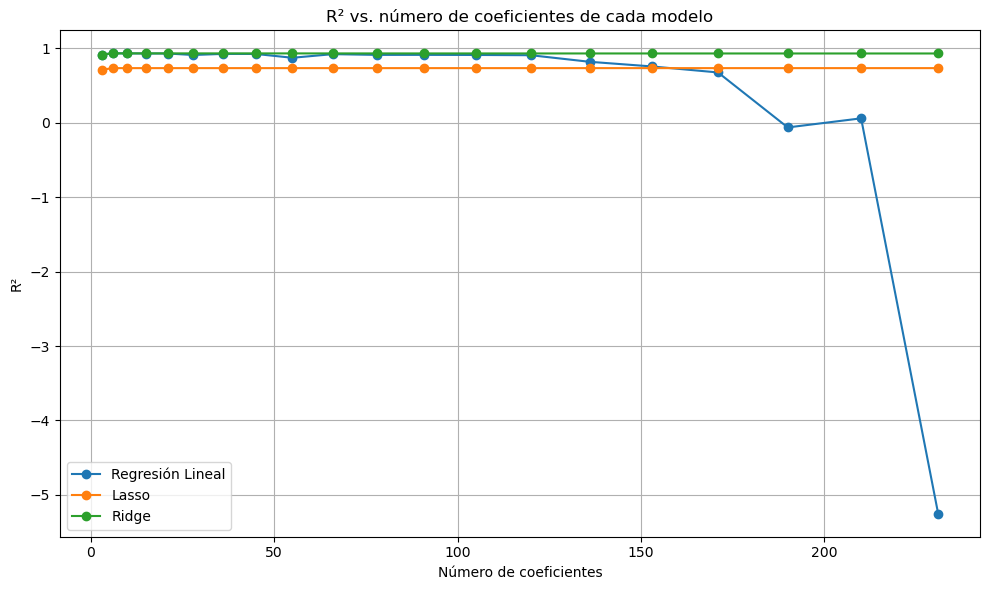

In [127]:
plt.figure(figsize=(10, 6))

plt.plot(df_coef["Coefs_totales"], df_coef["R² Reg"], label="Regresión Lineal", marker='o')
plt.plot(df_coef["Coefs_totales"], df_coef["R² Lasso"], label="Lasso", marker='o')
plt.plot(df_coef["Coefs_totales"], df_coef["R² Ridge"], label="Ridge", marker='o')

plt.xlabel("Número de coeficientes")
plt.ylabel("R²")
plt.title("R² vs. número de coeficientes de cada modelo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

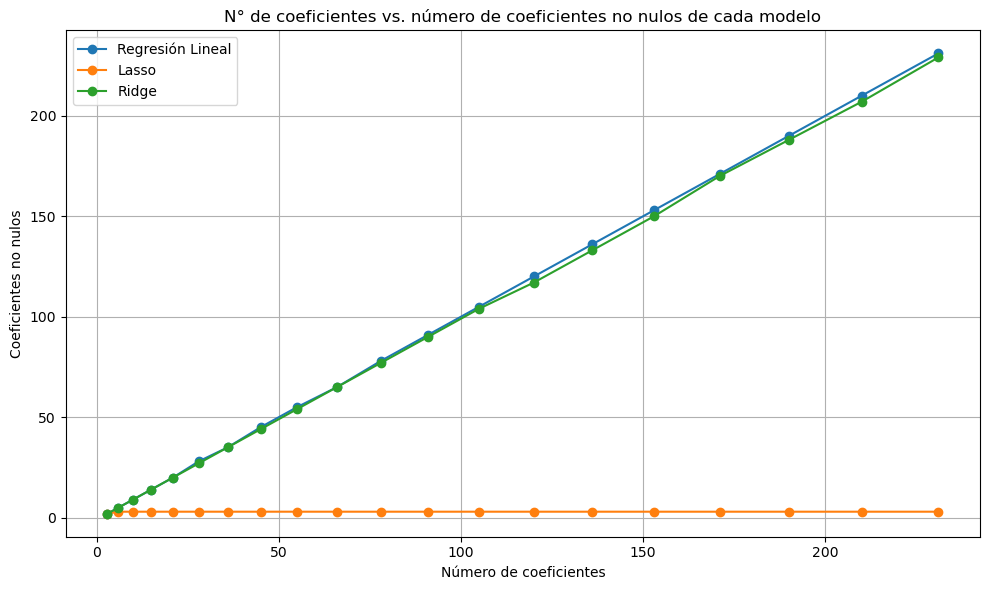

In [128]:
plt.figure(figsize=(10, 6))

plt.plot(df_coef["Coefs_totales"], df_coef["Reg (coefs no nulos)"], label="Regresión Lineal", marker='o')
plt.plot(df_coef["Coefs_totales"], df_coef["Lasso (coefs no nulos)"], label="Lasso", marker='o')
plt.plot(df_coef["Coefs_totales"], df_coef["Ridge (coefs no nulos)"], label="Ridge", marker='o')

plt.xlabel("Número de coeficientes")
plt.ylabel("Coeficientes no nulos")
plt.title("N° de coeficientes vs. número de coeficientes no nulos de cada modelo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

¿Por qué el desempeño de la regresión lineal cae? ¿Por qué los modelos Ridge y Lasso difieren en la cantidad de coeficientes no nulos?

R1: Como el modelo de regresión lineal no tiene regularización, al aumentar el grado el modelo aprende cada vez más coeficientes causando un overfitting y por consiguiente la capacidad de generalización.

R2: Los modelos Ridge y Lasso difieren en cantidad de coefs no nulos debido a que en el caso de Lasso, penaliza la suma de valor absoluto de los coeficientes, llevando muchos coeficientes a cero, mientras que Ridge penaliza el tamaño de los coeficientes, pero sin llevarlos a cero, sino que va restando peso a medida que se tienen más coeficientes.